In [218]:
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
from cdae.utils import *

import seaborn as sns

%matplotlib inline

matplotlib.font_manager._rebuild()

plt.style.use('clean.mplstyle')
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
})

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

alpha_1 = 0.75
alpha_2 = 0.5
font_size = 20

def change_spine_asthetics(ax):
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_linewidth(0.5)
        ax.spines[spine].set_color('#BABABA')
    return None


## Fig. 8

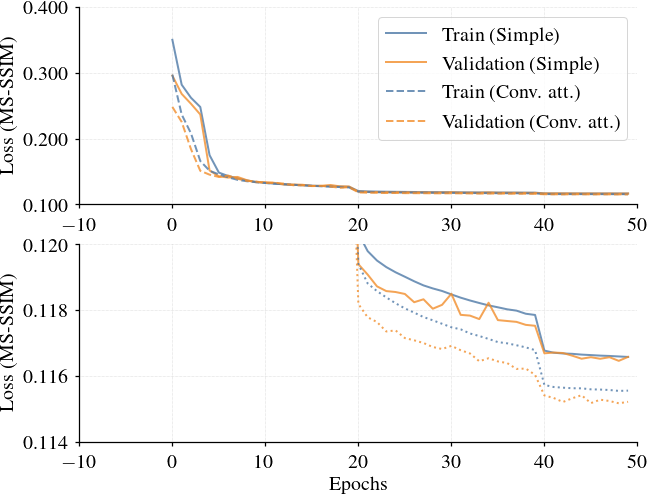

In [174]:
# Load data
run_id_ae_1 = 1632282330    # Plain 
run_id_ae_3 = 1633690232    # Conv. Att

path_results = "../results/autoencoder_carla/"
path_data_1 = os.path.join(path_results, f"1632282330_128_Simple/1632282330_log.txt")
path_data_2 = os.path.join(path_results, f"1633690232_128_ConvAtt/1633690232_log.txt")

text = ""
save_fig = False

n = 50
lw = 2

data_1 = np.genfromtxt(path_data_1, dtype=float, delimiter=",", names=True)
data_3 = np.genfromtxt(path_data_2, dtype=float, delimiter=",", names=True)

# Plot
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(211)

ax1.tick_params(axis='both', which='major', labelsize=font_size)
ax1.tick_params(axis='both', which='minor', labelsize=font_size)

ax1.set_ylabel("Loss (MS-SSIM)", fontsize=font_size)

ax1.plot(data_1["epoch"][:n], data_1["loss_train"][:n], alpha=0.8, c=colors[0],  linestyle="-", linewidth=lw)
ax1.plot(data_1["epoch"][:n], data_1["loss_val"][:n], alpha=0.8, c=colors[1],linewidth=lw, linestyle="-")
ax1.plot(data_3["epoch"][:n], data_3["loss_train"][:n], alpha=0.8, c=colors[0], linestyle="--",linewidth=lw)
ax1.plot(data_3["epoch"][:n], data_3["loss_val"][:n], alpha=0.8, c=colors[1], linestyle="--",linewidth=lw)

ax1.legend(["Train (Simple)", "Validation (Simple)", 
    "Train (Conv. att.)", "Validation (Conv. att.)"], prop={"size":font_size})

ax1.plot()
ax1.grid(linestyle=':')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax2 = fig.add_subplot(212)

ax2.tick_params(axis='both', which='major', labelsize=font_size)
ax2.tick_params(axis='both', which='minor', labelsize=font_size)

ax2.set_xlabel("Epochs", fontsize=font_size)
ax2.set_ylabel("Loss (MS-SSIM)", fontsize=font_size)

ax2.plot(data_1["epoch"][:n], data_1["loss_train"][:n], alpha=0.8, c=colors[0],linewidth=lw)
ax2.plot(data_1["epoch"][:n], data_1["loss_val"][:n], alpha=0.8, c=colors[1],linewidth=lw, linestyle="-")
ax2.plot(data_3["epoch"][:n], data_3["loss_train"][:n], alpha=0.8, c=colors[0], linestyle=":",linewidth=lw)
ax2.plot(data_3["epoch"][:n], data_3["loss_val"][:n], alpha=0.8, c=colors[1], linestyle=":",linewidth=lw)

# ax1.legend(["Train (Simple)", "Validation (Simple)", 
#     "Train (Conv. att.)", "Validation (Conv. att.)"], prop={"size":16})

ax2.plot()
ax2.grid(linestyle=':')
ax2.set_ylim([0.114, 0.12])

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

# if save_fig:
#     fig.savefig(os.path.join(path_results, f"{run_id}/{run_id}.png"), dpi=250)
fig.savefig("results_ae_zoom.pdf", dpi=300)

# Fig. 8 (Updated)

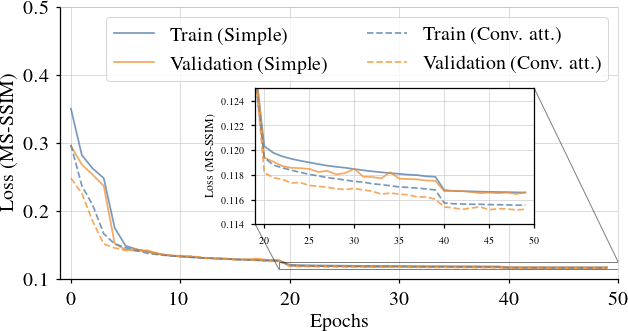

In [179]:
#plt.style.use('clean.mplstyle')
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(data_1["epoch"][:n], data_1["loss_train"][:n], alpha=alpha_1, c=colors[0])
ax.plot(data_1["epoch"][:n], data_1["loss_val"][:n], alpha=alpha_1, c=colors[1])
ax.plot(data_3["epoch"][:n], data_3["loss_train"][:n], alpha=alpha_1, c=colors[0],linestyle="--")
ax.plot(data_3["epoch"][:n], data_3["loss_val"][:n], alpha=alpha_1, c=colors[1], linestyle="--")
ax.set_xlim([-1, 50])
ax.set_ylim([0.1, 0.5])
ax.grid()
ax.set_xlabel("Epochs", fontsize=font_size)
ax.set_ylabel("Loss (MS-SSIM)", fontsize=font_size)

ax.legend(["Train (Simple)", "Validation (Simple)", 
    "Train (Conv. att.)", "Validation (Conv. att.)"], ncol=2, fontsize=font_size)
# ax.legend(["Train (Simple)", "Validation (Simple)"], ncol=2)
ax.tick_params(axis='both', which='major', labelsize=font_size)
ax.tick_params(axis='both', which='minor', labelsize=font_size)

# inset axes.... (add inplot)
axins = ax.inset_axes([0.35, 0.2, 0.5, 0.5])

axins.plot(data_1["epoch"][:n], data_1["loss_train"][:n], alpha=alpha_1, c=colors[0])
axins.plot(data_1["epoch"][:n], data_1["loss_val"][:n], alpha=alpha_1, c=colors[1])
axins.plot(data_3["epoch"][:n], data_3["loss_train"][:n], alpha=alpha_1, c=colors[0], linestyle="--")
axins.plot(data_3["epoch"][:n], data_3["loss_val"][:n], alpha=alpha_1, c=colors[1], linestyle="--")
axins.spines['right'].set_visible(True)
axins.spines['top'].set_visible(True)

# sub region of the original image
x1, x2, y1, y2 = 19, 50, 0.114, 0.125
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#axins.set_xlabel("Epochs")
axins.set_ylabel("Loss (MS-SSIM)", fontsize=12)
axins.grid(":")

ax.indicate_inset_zoom(axins, edgecolor="black")
ax = change_spine_asthetics(ax)

fig.savefig("results_ae_zoom.pdf", dpi=300)

# Fig. 10

/home/gorka/Git/latent-estimation/cdae/utils.py:669: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config_lstm = yaml.load(file)


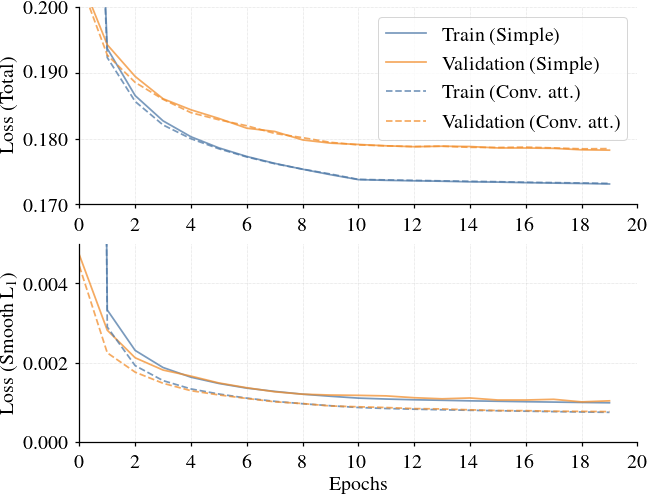

In [191]:
run_id_gru_1 = 1633085390
run_id_gru_3 = 1633779122

data_gru_1, config_gru_1 = get_data_config(run_id_gru_1, f"../results/rnn_carla")
data_gru_3, config_gru_3 = get_data_config(run_id_gru_3, f"../results/rnn_carla")

e = 20
fig = plt.figure(figsize=(10, 8))

text_temp = f"GRU Training Comparison"

# First
ax1 = fig.add_subplot(211)
ax1.plot(data_gru_1['epoch'][:e], data_gru_1['loss_train'][:e], alpha=alpha_1, c=colors[0])
ax1.plot(data_gru_1['epoch'][:e], data_gru_1['loss_val'][:e], alpha=alpha_1, c=colors[1])
ax1.plot(data_gru_3['epoch'][:e], data_gru_3['loss_train'][:e], alpha=alpha_1, c=colors[0], linestyle='--')
ax1.plot(data_gru_3['epoch'][:e], data_gru_3['loss_val'][:e], alpha=alpha_1, c=colors[1], linestyle='--')
#ax1.set_title(f"Loss - Total", fontdict = {'fontsize':ls})
ax1.legend(["Train (Simple)", "Validation (Simple)", 
    "Train (Conv. att.)", "Validation (Conv. att.)"], prop={"size":font_size})
#ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss (Total)",  fontsize=font_size)
ax1.grid(linestyle=":")
ax1.set_xlim([0, e])
ax1.set_ylim([0.17, 0.2])
ax1.plot()

ax1.tick_params(axis='both', which='major', labelsize=font_size)
ax1.tick_params(axis='both', which='minor', labelsize=font_size)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

#ax1 = change_spine_asthetics(ax)

# # Second
# ax1 = fig.add_subplot(312)
# ax1.plot(data_gru_1['epoch'][:e], data_gru_1['loss_train_image'][:e], alpha=alpha_1, c=colors[0])
# ax1.plot(data_gru_1['epoch'][:e], data_gru_1['loss_val_image'][:e], alpha=alpha_1, c=colors[1])
# ax1.plot(data_gru_3['epoch'][:e], data_gru_3['loss_train_image'][:e], alpha=alpha_1, c=colors[0], linestyle=':')
# ax1.plot(data_gru_3['epoch'][:e], data_gru_3['loss_val_image'][:e], alpha=alpha_1, c=colors[1], linestyle=':')
# ax1.set_title(f"Loss - Image (MS-SSIM)", fontdict = {'fontsize':font_size})
# # ax1.legend(["Train (Latent 64, ReLU Out)", "Validation (Latent 64, ReLU Out)", 
# #     "Train (Latent 128, ReLU Out)", "Validation (Latent 128, ReLU Out)", 
# #     "Train (Latent 512, Sigmoid)", "Validation (Latent 512, Sigmoid)"], prop={"size":16})
# #ax1.set_xlabel("Epochs")
# ax1.set_ylabel("Loss",  fontsize=font_size)
# ax1.grid(linestyle=":")
# ax1.set_ylim([0.16,0.2])
# ax1.plot()

# ax1.tick_params(axis='both', which='major', labelsize=font_size)
# ax1.tick_params(axis='both', which='minor', labelsize=font_size)

# Third
ax2 = fig.add_subplot(212)
ax2.plot(data_gru_1['epoch'][:e], data_gru_1['loss_train_latent'][:e], alpha=alpha_1, c=colors[0])
ax2.plot(data_gru_1['epoch'][:e], data_gru_1['loss_val_latent'][:e], alpha=alpha_1, c=colors[1])
ax2.plot(data_gru_3['epoch'][:e], data_gru_3['loss_train_latent'][:e], alpha=alpha_1, c=colors[0], linestyle='--')
ax2.plot(data_gru_3['epoch'][:e], data_gru_3['loss_val_latent'][:e], alpha=alpha_1, c=colors[1], linestyle='--')
#ax1.set_title(f"Loss - Latent (Smooth L1)", fontdict = {'fontsize':ls})
# ax1.legend(["Train (Latent 64, ReLU Out)", "Validation (Latent 64, ReLU Out)", 
#     "Train (Latent 128, ReLU Out)", "Validation (Latent 128, ReLU Out)", 
#     "Train (Latent 512, Sigmoid)", "Validation (Latent 512, Sigmoid)"], prop={"size":16})
ax2.set_xlabel("Epochs",  fontsize=ls)
ax2.set_ylabel("Loss (Smooth L$_1$)",  fontsize=ls)
#ax1.ticklabel_format(axis='y', style="sci", scilimits=(1,0))
ax2.grid(linestyle=":")
ax2.set_xlim([0, e])
ax2.set_ylim([0, 0.005])

ax2.tick_params(axis='both', which='major', labelsize=font_size)
ax2.tick_params(axis='both', which='minor', labelsize=font_size)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax2.plot()


fig.savefig("results_rnn.pdf", dpi=300)

# Fig. 7

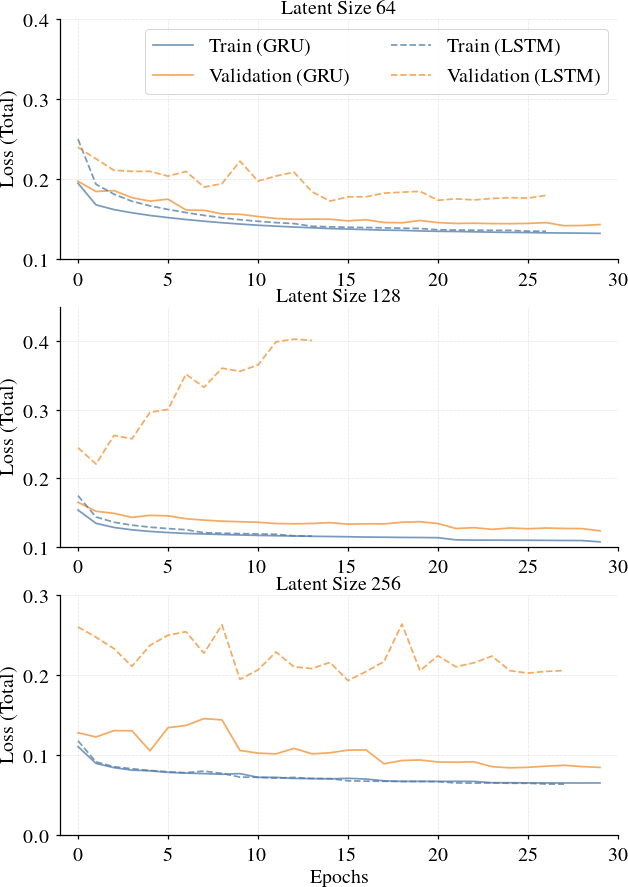

In [207]:
path_gru_064 = "2022-04-22_1650667429" # GRU 064
path_gru_128 = "2022-04-22_1650626464" # GRU 128
path_gru_256 = "2022-04-23_1650706749" # GRU 256

path_lstm_064 = "2022-04-22_1650652153" # LSTM 064
path_lstm_128 = "2022-04-22_1650627403" # LSTM 128
path_lstm_256 = "2022-04-22_1650687728" # LSTM 256

data_gru_064 = np.genfromtxt(f"../results/{path_gru_064}/{path_gru_064[11:]}_log.txt", dtype=float, delimiter=",", names=True)
data_gru_128 = np.genfromtxt(f"../results/{path_gru_128}/{path_gru_128[11:]}_log.txt", dtype=float, delimiter=",", names=True)
data_gru_256 = np.genfromtxt(f"../results/{path_gru_256}/{path_gru_256[11:]}_log.txt", dtype=float, delimiter=",", names=True)

data_lstm_064 = np.genfromtxt(f"../results/{path_lstm_064}/{path_lstm_064[11:]}_log.txt", dtype=float, delimiter=",", names=True)
data_lstm_128 = np.genfromtxt(f"../results/{path_lstm_128}/{path_lstm_128[11:]}_log.txt", dtype=float, delimiter=",", names=True)
data_lstm_256 = np.genfromtxt(f"../results/{path_lstm_256}/{path_lstm_256[11:]}_log.txt", dtype=float, delimiter=",", names=True)

e = 30
fig = plt.figure(figsize=(10, 15))

# text_temp = f"GRU Training Comparison"

# First
ax1 = fig.add_subplot(311)

ax1.tick_params(axis='both', which='major', labelsize=font_size)
ax1.tick_params(axis='both', which='minor', labelsize=font_size)

ax1.plot(data_gru_064['epoch'][:30], data_gru_064['loss_train'][:30], alpha=alpha_1, c=colors[0])
ax1.plot(data_gru_064['epoch'][:30], data_gru_064['loss_val'][:30], alpha=alpha_1, c=colors[1])
ax1.plot(data_lstm_064['epoch'][:30], data_lstm_064['loss_train'][:30], alpha=alpha_1, c=colors[0], linestyle='--')
ax1.plot(data_lstm_064['epoch'][:30], data_lstm_064['loss_val'][:30], alpha=alpha_1, c=colors[1], linestyle='--')

ax1.set_title(f"Latent Size 64", fontdict = {'fontsize':font_size})
ax1.legend(["Train (GRU)", "Validation (GRU)", 
    "Train (LSTM)", "Validation (LSTM)"], prop={"size":font_size}, ncol=2)
#ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss (Total)",  fontsize=font_size)
ax1.grid(linestyle=":")
ax1.set_xlim([-1, e])
ax1.set_ylim([0.1, 0.4])
ax1.plot()


# Second
ax2 = fig.add_subplot(312)

ax2.tick_params(axis='both', which='major', labelsize=font_size)
ax2.tick_params(axis='both', which='minor', labelsize=font_size)

ax2.plot(data_gru_128['epoch'][:30], data_gru_128['loss_train'][:30], alpha=alpha_1, c=colors[0])
ax2.plot(data_gru_128['epoch'][:30], data_gru_128['loss_val'][:30], alpha=alpha_1, c=colors[1])
ax2.plot(data_lstm_128['epoch'][:30], data_lstm_128['loss_train'][:30], alpha=alpha_1, c=colors[0], linestyle='--')
ax2.plot(data_lstm_128['epoch'][:30], data_lstm_128['loss_val'][:30], alpha=alpha_1, c=colors[1], linestyle='--')

ax2.set_title(f"Latent Size 128", fontdict = {'fontsize':font_size})
# ax2.legend(["Train (GRU)", "Validation (GRU)", 
#    "Train (LSTM)", "Validation (LSTM)"], prop={"size":ls})
#ax1.set_xlabel("Epochs")
ax2.set_ylabel("Loss (Total)",  fontsize=font_size)
ax2.grid(linestyle=":")
ax2.set_xlim([-1, e])
ax2.set_ylim([0.1, 0.45])
ax2.plot()


# Third
ax3 = fig.add_subplot(313)

ax3.tick_params(axis='both', which='major', labelsize=font_size)
ax3.tick_params(axis='both', which='minor', labelsize=font_size)

ax3.plot(data_gru_256['epoch'][:30], data_gru_256['loss_train'][:30], alpha=alpha_1, c=colors[0])
ax3.plot(data_gru_256['epoch'][:30], data_gru_256['loss_val'][:30], alpha=alpha_1, c=colors[1])
ax3.plot(data_lstm_256['epoch'][:30], data_lstm_256['loss_train'][:30], alpha=alpha_1, c=colors[0], linestyle='--')
ax3.plot(data_lstm_256['epoch'][:30], data_lstm_256['loss_val'][:30], alpha=alpha_1, c=colors[1], linestyle='--')

ax3.set_title(f"Latent Size 256", fontdict = {'fontsize':font_size})
# ax3.legend(["Train (GRU)", "Validation (GRU)", 
#    "Train (LSTM)", "Validation (LSTM)"], prop={"size":ls})
ax3.set_xlabel("Epochs",  fontsize=font_size)
ax3.set_ylabel("Loss (Total)",  fontsize=font_size)
ax3.grid(linestyle=":")
ax3.set_xlim([-1, e])
ax3.set_ylim([0.0, 0.3])
ax3.plot()

# ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

fig.savefig("results_rnn_ablation.pdf", dpi=300)

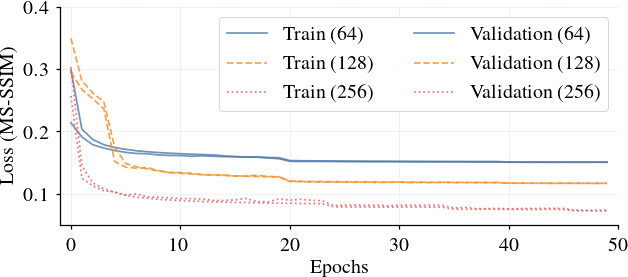

In [217]:
path_ae_064 = "../results/autoencoder_carla/1632241958_64_Simple/1632241958_log.txt"
path_ae_128 = "../results/autoencoder_carla/1632282330_128_Simple/1632282330_log.txt"
path_ae_256 = "../results/autoencoder_carla/1635988988_256_Simple/1635988988_log.txt"
data_ae_064 = np.genfromtxt(path_ae_064, dtype=float, delimiter=",", names=True)
data_ae_128 = np.genfromtxt(path_ae_128, dtype=float, delimiter=",", names=True)
data_ae_256 = np.genfromtxt(path_ae_256, dtype=float, delimiter=",", names=True)

e = 50

# First
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(111)

ax1.tick_params(axis='both', which='major', labelsize=font_size)
ax1.tick_params(axis='both', which='minor', labelsize=font_size)

t_064, = ax1.plot(data_ae_064['epoch'][:e], data_ae_064['loss_train'][:e], alpha=0.8, c=colors[0])
v_064, = ax1.plot(data_ae_064['epoch'][:e], data_ae_064['loss_val'][:e], alpha=0.8, c=colors[0])
t_128, = ax1.plot(data_ae_128['epoch'][:e], data_ae_128['loss_train'][:e], alpha=0.8, c=colors[1], linestyle='--')
v_128, = ax1.plot(data_ae_128['epoch'][:e], data_ae_128['loss_val'][:e], alpha=0.8, c=colors[1], linestyle='--')
t_256, = ax1.plot(data_ae_256['epoch'][:e], data_ae_256['loss_train'][:e], alpha=0.8, c=colors[2], linestyle=':')
v_256, = ax1.plot(data_ae_256['epoch'][:e], data_ae_256['loss_val'][:e], alpha=0.8, c=colors[2], linestyle=':')

# ax1.set_title(f"Latent Size 64", fontdict = {'fontsize':ls})
ax1.legend([t_064, t_128, t_256, v_064, v_128, v_256], ["Train (64)", "Train (128)", 
    "Train (256)", "Validation (64)",
    "Validation (128)", "Validation (256)"], prop={"size":font_size}, ncol=2)
ax1.set_xlabel("Epochs",  fontsize=font_size)
ax1.set_ylabel("Loss (MS-SSIM)",  fontsize=font_size)
ax1.grid(linestyle=":")
ax1.set_xlim([-1, e])
ax1.set_ylim([0.05, 0.4])
ax1.plot()

fig.savefig("results_autoencoder_ablation.pdf", dpi=300)

# Imitation

[65. 64. 63. 54. 47.]
0.770870172 None
[37. 38. 27. 39. 50.]
0.77298559 None


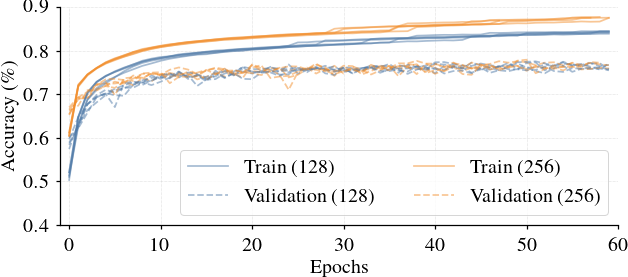

In [221]:
e = 60

run_ids_128 = [1637360098, 1637393261, 1637379685, 1637406617, 1637445741] # 128 3090
run_ids_256 = [1637222173, 1637227322, 1637245280, 1637255358, 1637343803] # 256 3090

path_128 = "../results/imitation_carla/128_paper"
path_256 = "../results/imitation_carla/256_paper"

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(111)

acc_128_max, acc_256_max  = np.zeros(len(run_ids_128)), np.zeros(len(run_ids_256))
idx_128_max, idx_256_max = np.zeros(len(run_ids_128)), np.zeros(len(run_ids_128))

for i in range(len(run_ids_128)):

    data_128 = np.genfromtxt(os.path.join(path_128, f"{run_ids_128[i]}/{run_ids_128[i]}_log.txt"), 
        dtype=float, delimiter=",", names=True)
    data_256 = np.genfromtxt(os.path.join(path_256, f"{run_ids_256[i]}/{run_ids_256[i]}_log.txt"), 
        dtype=float, delimiter=",", names=True)

    acc_128_max[i] = np.max(data_128['acc_val'])
    acc_256_max[i] = np.max(data_256['acc_val'])
    idx_128_max[i] = np.argmax(data_128['acc_val'])
    idx_256_max[i] = np.argmax(data_256['acc_val'])

    ax1.tick_params(axis='both', which='major', labelsize=font_size)
    ax1.tick_params(axis='both', which='minor', labelsize=font_size)

    ax1.plot(data_128['epoch'][:e], data_128['acc_train'][:e], alpha=alpha_2, c=colors[0])
    ax1.plot(data_128['epoch'][:e], data_128['acc_val'][:e], alpha=0.5, c=colors[0], linestyle='--')
    ax1.plot(data_256['epoch'][:e], data_256['acc_train'][:e], alpha=0.5, c=colors[1])
    ax1.plot(data_256['epoch'][:e], data_256['acc_val'][:e], alpha=0.5, c=colors[1], linestyle='--')

ax1.legend(["Train (128)", "Validation (128)", 
    "Train (256)", "Validation (256)"], prop={"size":font_size}, ncol = 2)

ax1.set_xlim([-1, e])

ax1.set_xlabel("Epochs",  fontsize=font_size)
ax1.set_ylabel("Accuracy (\%)",  fontsize=font_size)
ax1.grid(linestyle=":")

print(np.mean(acc_128_max), print(idx_128_max))
print(np.mean(acc_256_max), print(idx_256_max))

fig.savefig("results_imitation_ablation.pdf", dpi=300)